### Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/aParsecFromFuture/COVID-19-stats/main/Turkey/datasets/genel_koronavir%C3%BCs_tablosu.csv'

df_covid = pd.read_csv(url, index_col='Tarih', parse_dates=['Tarih'])
df_covid = df_covid.iloc[::-1]

### Line Plot

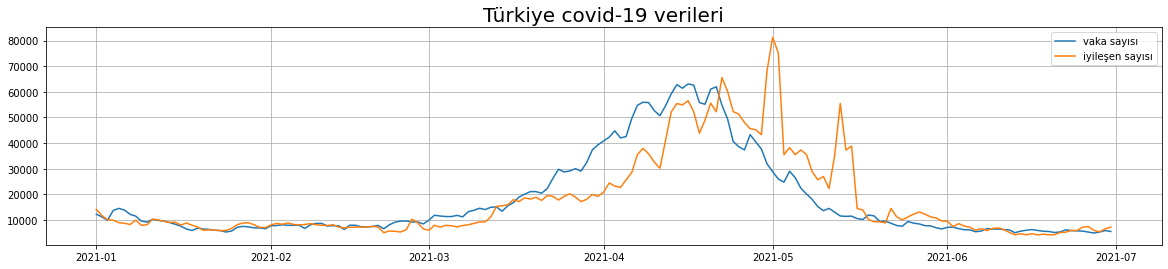

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))

ax.set_title('Türkiye covid-19 verileri', fontsize=20)

ax.plot(df_covid.loc['2021-01-01':, 'Bugünkü Vaka Sayısı'], label='vaka sayısı')
ax.plot(df_covid.loc['2021-01-01':, 'Bugünkü İyileşen Sayısı'], label='iyileşen sayısı')

ax.legend()
ax.grid()

plt.show()

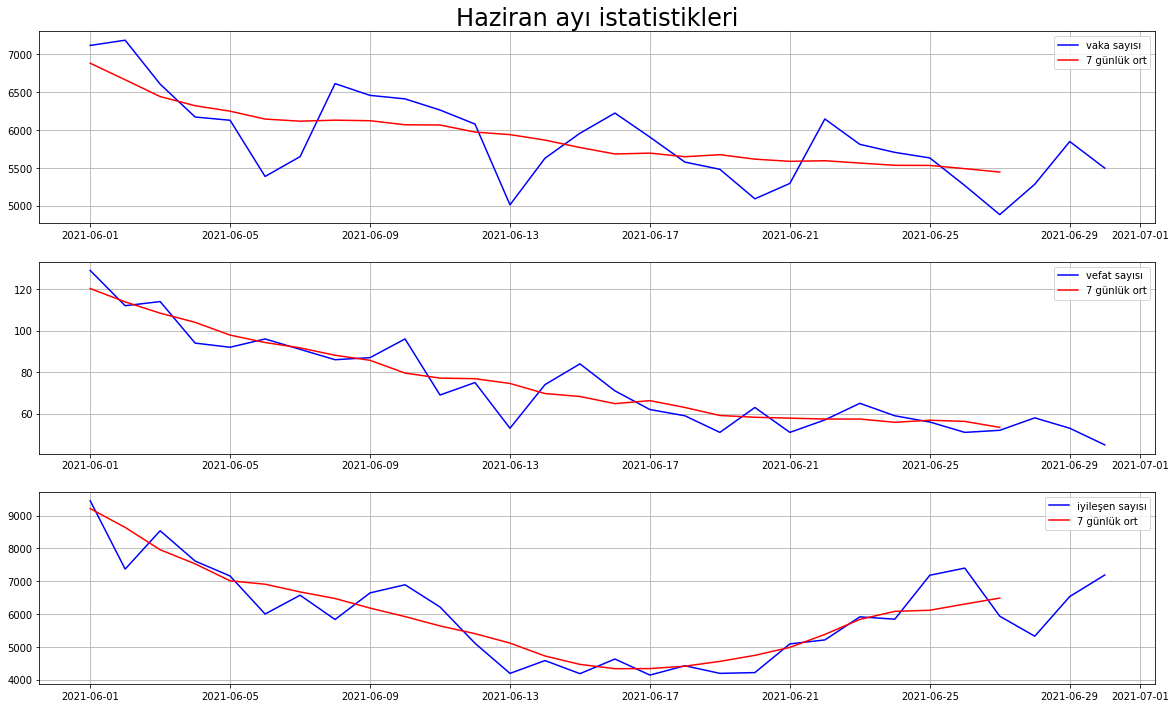

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(20, 12))

from_date = '2021-06-01'

dataset = [df_covid['Bugünkü Vaka Sayısı'], df_covid['Bugünkü Vefat Sayısı'], df_covid['Bugünkü İyileşen Sayısı']]
moving_average = [data.rolling(window=7).mean().shift(-3) for data in dataset] 
labels = ['vaka sayısı', 'vefat sayısı', 'iyileşen sayısı']

ax[0].set_title('Haziran ayı istatistikleri', fontsize=24)

for i in range(3):
  ax[i].plot(dataset[i][from_date:], color='blue', label=labels[i])
  ax[i].plot(moving_average[i][from_date:], color='red', label='7 günlük ort')

  ax[i].grid()
  ax[i].legend()

plt.show()

In [5]:
cols = ['Hastalarda Zatürre Oranı (%)', 'Ağır Hasta Sayısı', 'Bugünkü Vaka Sayısı', 'Bugünkü Hasta Sayısı', 'Bugünkü Test Sayısı', 'Bugünkü Vefat Sayısı', 'Bugünkü İyileşen Sayısı']
from_date = '01-01-2021'
corr_matrix = df_covid.loc[from_date:, cols].corr()

corr_matrix

,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
Hastalarda Zatürre Oranı (%),1.000000,-0.055903,-0.327466,-0.336495,-0.583959,-0.246238,-0.402698
Ağır Hasta Sayısı,-0.055903,1.000000,0.612786,0.864477,0.491388,0.918825,0.736910
Bugünkü Vaka Sayısı,-0.327466,0.612786,1.000000,0.872338,0.751575,0.677196,0.799161
Bugünkü Hasta Sayısı,-0.336495,0.864477,0.872338,1.000000,0.713778,0.896973,0.904990
Bugünkü Test Sayısı,-0.583959,0.491388,0.751575,0.713778,1.000000,0.664651,0.699312
Bugünkü Vefat Sayısı,-0.246238,0.918825,0.677196,0.896973,0.664651,1.000000,0.846896
Bugünkü İyileşen Sayısı,-0.402698,0.736910,0.799161,0.904990,0.699312,0.846896,1.000000


### Correlation Matrix

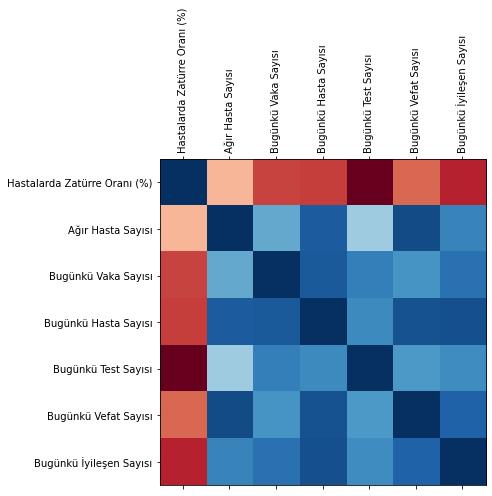

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.set_xticklabels([''] + cols)
ax.set_yticklabels([''] + cols)

ax.matshow(corr_matrix, cmap='RdBu')

plt.xticks(rotation='vertical')
plt.show()

### Bar Chart

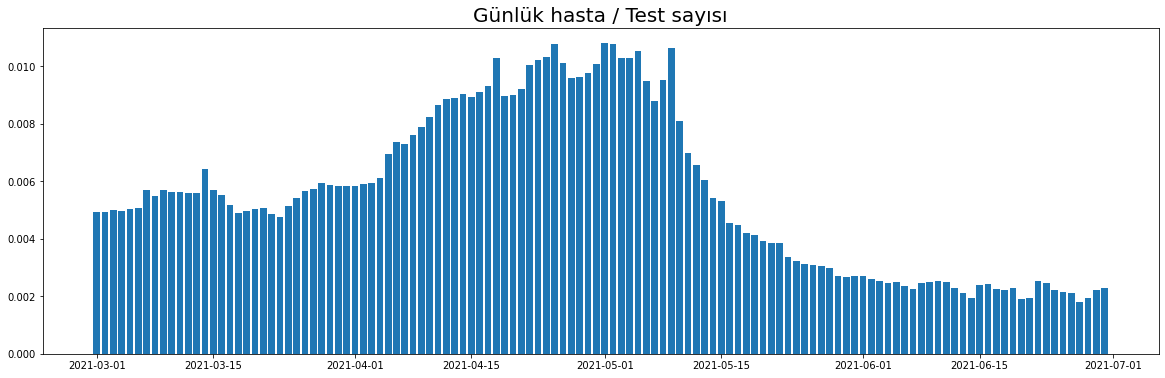

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

from_date = '2021-03-01'
rpatient = df_covid.loc[from_date:, 'Bugünkü Hasta Sayısı'] / df_covid.loc[from_date:, 'Bugünkü Test Sayısı']

ax.set_title('Günlük hasta / Test sayısı', fontsize=20)
ax.bar(rpatient.index, rpatient.values)

plt.show()